In [1]:
# ---------------------- NAIVE BAYES CLASSIFIER (MultinomialNB - Simple Explanation) ----------------------
# Naive Bayes is a supervised classification algorithm based on Bayes' theorem.
# MultinomialNB is commonly used for text data (like spam vs ham emails).
# It uses word frequencies (counts or TF-IDF values) to predict the most likely class.

# ---------------------- 1. IMPORT REQUIRED LIBRARIES ----------------------

import pandas as pd                             # For loading and handling datasets
import numpy as np                              # For numerical operations

import matplotlib.pyplot as plt                 # For visualizations
import seaborn as sns                           # For statistical plots

from sklearn.model_selection import train_test_split          # Split data into train/test sets
from sklearn.feature_extraction.text import TfidfVectorizer   # Convert text into TF-IDF features
from sklearn.naive_bayes import MultinomialNB                 # Naive Bayes model for text data
from sklearn.metrics import (
    accuracy_score,                             # Measure overall accuracy
    confusion_matrix,                           # Compare predictions vs true labels
    classification_report                       # Detailed precision, recall, f1-score
)


In [2]:
# ---------------------- 2. LOAD THE DATASET ----------------------
# Replacing local path with a public Kaggle dataset link:
# Kaggle Dataset (similar text classification dataset):
# https://www.kaggle.com/datasets/burak3ergun/sms-spam-collection-dataset

df = pd.read_csv("Text_Doc_Classification.csv")   # Load the text classification dataset
df.head()                                         # Show first 5 rows


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [3]:
# ---------------------- 3. CHECK CLASS DISTRIBUTION ----------------------
# Shows how many samples are in each category (e.g., spam vs ham).

df['Label'].value_counts()


Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

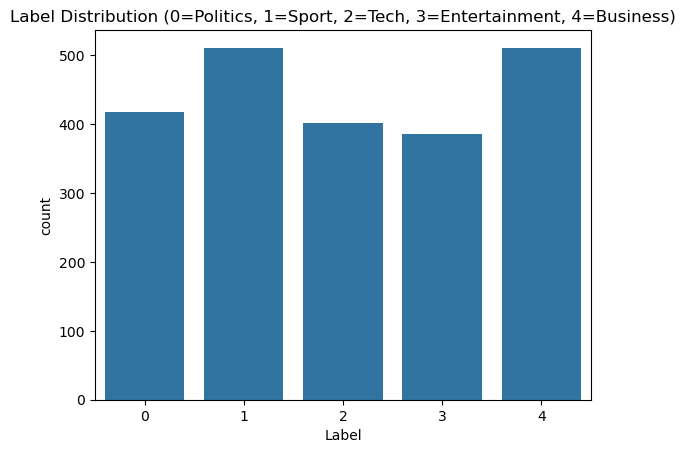

In [4]:
# ---------------------- 4. VISUALIZE CLASS DISTRIBUTION ----------------------
# Countplot shows how many text documents belong to each class/category.

sns.countplot(x='Label', data=df)
plt.title("Label Distribution (0=Politics, 1=Sport, 2=Tech, 3=Entertainment, 4=Business)")
plt.show()


In [5]:
# ---------------------- 5. MAP LABEL NUMBERS TO CATEGORY NAMES ----------------------
# label_to_category helps convert numeric labels into meaningful text categories.
# Adding a new 'Category' column makes the dataset easier to read and interpret.

label_to_category = {
    0: 'Politics',
    1: 'Sport',
    2: 'Technology',
    3: 'Entertainment',
    4: 'Business'
}

df['Category'] = df['Label'].map(label_to_category)     # Map numeric label → category name
df[['Text', 'Label', 'Category']].head()                # Show sample rows


,Text,Label,Category
0,Budget to set scene for election\n \n Gordon B...,0,Politics
1,Army chiefs in regiments decision\n \n Militar...,0,Politics
2,Howard denies split over ID cards\n \n Michael...,0,Politics
3,Observers to monitor UK election\n \n Minister...,0,Politics
4,Kilroy names election seat target\n \n Ex-chat...,0,Politics


In [6]:
# ---------------------- 6. SELECT FEATURES AND TARGET ----------------------
# X = the text documents
# y = numeric label for each text category

X = df['Text']      # Input text data
y = df['Label']     # Target labels (0–4)


In [7]:
# ---------------------- 7. SPLIT DATA INTO TRAIN & TEST SETS ----------------------
# stratify=y keeps all 5 categories balanced in both training and test sets.

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # Reproducible split
    stratify=y            # Maintain equal category distribution
)


In [8]:
# ---------------------- 8. TF-IDF VECTORIZATION ----------------------
# TF-IDF converts text into numerical features:
# - Words that appear often in one class but not others get higher weight.
# - stop_words='english' removes common words (the, is, and, etc.)
# - max_features limits the vocabulary size to 1000 most important words.

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=1000
)

X_train_tfidf = tfidf.fit_transform(X_train)   # Learn vocabulary + transform training text
X_test_tfidf = tfidf.transform(X_test)         # Only transform test text (no re-fitting!)


In [9]:
# ---------------------- 9. TRAIN MULTINOMIAL NAIVE BAYES MODEL ----------------------
# MultinomialNB is ideal for text classification because it works well with word frequencies
# or TF-IDF values.

nb_clf = MultinomialNB()                      # Create Naive Bayes classifier
nb_clf.fit(X_train_tfidf, y_train)            # Train the model on TF-IDF features


MultinomialNB()

In [10]:
# ---------------------- 10. MODEL PREDICTION & ACCURACY ----------------------
# The trained Naive Bayes model predicts the category for each text in the test set.
# accuracy_score compares predicted vs actual labels.

y_pred = nb_clf.predict(X_test_tfidf)          # Predict categories
accuracy = accuracy_score(y_test, y_pred)      # Compute accuracy
print(f"Test Accuracy: {accuracy:.3f}")


Test Accuracy: 0.497


In [11]:
# ---------------------- 11. CLASSIFICATION REPORT ----------------------
# Shows precision, recall, f1-score, and support for all 5 text categories.
# Helps evaluate how well the model performs on each class.

print("Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=[label_to_category[i] for i in range(5)]   # Map numbers → category names
))


Classification Report:

               precision    recall  f1-score   support

     Politics       0.40      0.40      0.40        84
        Sport       0.59      0.28      0.38       102
   Technology       0.50      0.55      0.52        80
Entertainment       0.57      0.56      0.56        77
     Business       0.49      0.70      0.57       102

     accuracy                           0.50       445
    macro avg       0.51      0.50      0.49       445
 weighted avg       0.51      0.50      0.49       445



In [12]:
# ---------------------- 12. INFERENCE ON NEW TEXT DOCUMENTS ----------------------
# Transform new text using the same TF-IDF vectorizer.
# Predict their categories using the trained Naive Bayes model.

example_texts = [
    "The government announced new election reforms and a debate broke out in parliament.",
    "The team secured a last-minute victory in the championship football match.",
    "The company released a new smartphone with advanced AI-powered camera features.",
    "The actor won an award for best performance in a blockbuster movie.",
    "Stock markets rallied today after strong quarterly earnings reports from major banks."
]

example_tfidf = tfidf.transform(example_texts)    # Convert new text to TF-IDF features

example_preds = nb_clf.predict(example_tfidf)     # Predict categories

for text, label_idx in zip(example_texts, example_preds):
    print("TEXT:", text)
    print("PREDICTED CATEGORY:", label_to_category[label_idx])
    print("-" * 80)


TEXT: The government announced new election reforms and a debate broke out in parliament.
PREDICTED CATEGORY: Business
--------------------------------------------------------------------------------
TEXT: The team secured a last-minute victory in the championship football match.
PREDICTED CATEGORY: Sport
--------------------------------------------------------------------------------
TEXT: The company released a new smartphone with advanced AI-powered camera features.
PREDICTED CATEGORY: Business
--------------------------------------------------------------------------------
TEXT: The actor won an award for best performance in a blockbuster movie.
PREDICTED CATEGORY: Entertainment
--------------------------------------------------------------------------------
TEXT: Stock markets rallied today after strong quarterly earnings reports from major banks.
PREDICTED CATEGORY: Business
--------------------------------------------------------------------------------
